In [416]:
import pandas as pd
import numpy as np
import datetime as dt

In [417]:
Customer_Acqusition=pd.read_csv('Customer Acqusition.csv')
Repayment=pd.read_csv('Repayment.csv')
spend=pd.read_csv('spend.csv')
Credit_Card_Data=pd.read_excel('Credit Card Data.xlsx')

In [418]:
Customer_Acqusition.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed


In [419]:
Customer_Acqusition.isna().sum()


No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [420]:
Repayment.head(5)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [421]:
Repayment.isna().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [422]:
Repayment.isna().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [423]:
Repayment.drop(['Unnamed: 4'],axis=1,inplace=True)
Repayment

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1518,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN


In [424]:
Repayment.dropna(axis=0,inplace=True)
Repayment

,SL No:,Customer,Month,Amount
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
5,6.0,A1,23-Feb-05,365366.62
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


In [425]:
spend.head(1)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.8


In [426]:
spend.isna().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [427]:
Credit_Card_Data.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed


In [428]:
Credit_Card_Data.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [429]:
Repayment['Month']=Repayment['Month'].apply(lambda x : pd.to_datetime(x))
spend['Month']=spend['Month'].apply(lambda x : pd.to_datetime(x))

In [430]:
Customer_Acqusition_Repayment=pd.merge(left=Customer_Acqusition,  right=Repayment ,on='Customer')

In [431]:
Customer_Acqusition_spend=pd.merge(left= Customer_Acqusition,  right= spend ,on = 'Customer')
Customer_Acqusition_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,139018.26
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,284521.06
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,90184.22


In [432]:
Customer_Acqusition.shape

(100, 8)

In [433]:
Repayment.shape

(1499, 4)

### 1. In the above dataset,

a. In case age is less than 18, replace it with mean of age values.

In [434]:
Customer_Acqusition.Age.mean()

46.49

In [435]:
Customer_Acqusition['Age']=Customer_Acqusition['Age'].replace ([Customer_Acqusition['Age'].loc[Customer_Acqusition['Age']<18]],Customer_Acqusition.Age.mean())

In [436]:
Customer_Acqusition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [437]:
 Customer_Acqusition_spend.Limit/2

0       250000.0
1       250000.0
2       250000.0
3       250000.0
4       250000.0
          ...   
1495     50000.0
1496      5000.0
1497      5000.5
1498      5001.0
1499     50000.0
Name: Limit, Length: 1500, dtype: float64

In [438]:
Customer_Acqusition_spend['Amount']=Customer_Acqusition_spend['Amount'].replace([Customer_Acqusition_spend['Amount'].loc[Customer_Acqusition_spend['Amount']>Customer_Acqusition_spend['Limit']]], [Customer_Acqusition_spend.Limit/2 ])
Customer_Acqusition_spend.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07


c. Incase the repayment amount is more than the limit, replace the repayment with the
limit.

In [439]:
Customer_Acqusition_Repayment.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,437555.12
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,165972.88
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,2005-02-23,365366.62


In [440]:

Customer_Acqusition_Repayment['Amount']=Customer_Acqusition_Repayment['Amount'].replace([Customer_Acqusition_Repayment['Amount'].loc[Customer_Acqusition_Repayment['Amount']>Customer_Acqusition_Repayment['Limit']]],[Customer_Acqusition_Repayment.Limit])

In [441]:
Customer_Acqusition_Repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,437555.12
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,165972.88
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,2005-02-23,365366.62
...,...,...,...,...,...,...,...,...,...,...,...
1494,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,2004-01-25,100000.00
1495,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,2004-01-12,10000.00
1496,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,2004-01-03,10001.00
1497,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,2004-01-15,10002.00


In [442]:
#Customer_Acqusition_Repayment.Limit<Customer_Acqusition_Repayment.Amount

### 2. From the above dataset create the following summaries:

a. How many distinct customers exist?

In [443]:
Customer_Acqusition_spend.groupby('Customer').Month.nunique().count()

100

In [444]:
Customer_Acqusition_Repayment.groupby('Customer').Month.nunique().count()

100

b. How many distinct categories exist?

In [445]:
Customer_Acqusition_spend.groupby('Product').Month.nunique().count()

3

In [446]:
Customer_Acqusition_Repayment.groupby('Product').Month.nunique().count()

3

c. What is the average monthly spend by customers?

In [447]:
Customer_Acqusition_spend.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07


In [448]:
Customer_Acqusition_spend_avg=Customer_Acqusition_spend.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
Customer_Acqusition_spend_avg.head(5)

,Customer,Month,Amount
0,A1,2004-01-03,410556.130
1,A1,2004-01-12,463017.010
2,A1,2004-01-15,23740.460
3,A1,2004-01-25,439656.715
4,A1,2004-02-05,52208.650


In [449]:
Customer_Acqusition_spend_avg['spend_month']=Customer_Acqusition_spend_avg['Month'].apply( lambda x:x.month)
Customer_Acqusition_spend_avg

,Customer,Month,Amount,spend_month
0,A1,2004-01-03,410556.130,1
1,A1,2004-01-12,463017.010,1
2,A1,2004-01-15,23740.460,1
3,A1,2004-01-25,439656.715,1
4,A1,2004-02-05,52208.650,2
...,...,...,...,...
1252,A95,2004-01-15,240401.500,1
1253,A96,2004-01-25,54729.660,1
1254,A97,2004-01-12,5000.000,1
1255,A98,2004-01-03,5000.500,1


In [450]:
Customer_Acqusition_spend_avg=Customer_Acqusition_spend_avg.groupby(['Customer','spend_month'])[['Amount']].mean().reset_index()
Customer_Acqusition_spend_avg

,Customer,spend_month,Amount
0,A1,1,341332.87700
1,A1,2,138421.15125
2,A1,4,261649.25000
3,A1,5,361141.31000
4,A1,8,344372.10000
...,...,...,...
573,A95,1,240401.50000
574,A96,1,54729.66000
575,A97,1,5000.00000
576,A98,1,5000.50000


d. What is the average monthly repayment by customers?

In [451]:
Customer_Acqusition_Repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,437555.12
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,165972.88
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,2005-02-23,365366.62
...,...,...,...,...,...,...,...,...,...,...,...
1494,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,2004-01-25,100000.00
1495,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,2004-01-12,10000.00
1496,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,2004-01-03,10001.00
1497,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,2004-01-15,10002.00


In [452]:
Customer_Acqusition_Repayment['Repayment_month']=Customer_Acqusition_Repayment.Month.apply(lambda x:x.month)

In [453]:
Customer_Acqusition_Repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Repayment_month
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02,1
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06,1
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,437555.12,1
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,165972.88,1
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,2005-02-23,365366.62,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1494,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,2004-01-25,100000.00,1
1495,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,2004-01-12,10000.00,1
1496,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,2004-01-03,10001.00,1
1497,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,2004-01-15,10002.00,1


In [454]:
Customer_Acqusition_Repayment_avg=Customer_Acqusition_Repayment.groupby(['Customer','Repayment_month'])[['Amount']].mean().reset_index()
Customer_Acqusition_Repayment_avg.head()

,Customer,Repayment_month,Amount
0,A1,1,318731.923333
1,A1,2,156374.760000
2,A1,4,254474.580000
3,A1,7,297176.740000
4,A1,9,186427.500000


e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [455]:
Customer_Acqusition_spend_Repayment=pd.merge(left=Customer_Acqusition_spend_avg,right=Customer_Acqusition_Repayment_avg, left_on=['Customer','spend_month'],right_on=['Customer','Repayment_month'])

In [456]:
Customer_Acqusition_spend_Repayment.head(5)

,Customer,spend_month,Amount_x,Repayment_month,Amount_y
0,A1,1,341332.87700,1,318731.923333
1,A1,2,138421.15125,2,156374.760000
2,A1,4,261649.25000,4,254474.580000
3,A1,11,183839.61000,11,285729.090000
4,A10,1,173828.28250,1,272897.385000


In [457]:
Customer_Acqusition_spend_Repayment.groupby(['Customer','Repayment_month'])[['Amount_x','Amount_y']].sum().reset_index()

,Customer,Repayment_month,Amount_x,Amount_y
0,A1,1,341332.87700,318731.923333
1,A1,2,138421.15125,156374.760000
2,A1,4,261649.25000,254474.580000
3,A1,11,183839.61000,285729.090000
4,A10,1,173828.28250,272897.385000
...,...,...,...,...
449,A95,1,240401.50000,369405.960000
450,A96,1,54729.66000,100000.000000
451,A97,1,5000.00000,10000.000000
452,A98,1,5000.50000,10001.000000


In [458]:
Customer_Acqusition_spend_Repayment['Monthly_Profit']=Customer_Acqusition_spend_Repayment.Amount_y-Customer_Acqusition_spend_Repayment.Amount_x

In [459]:
Customer_Acqusition_spend_Repayment

,Customer,spend_month,Amount_x,Repayment_month,Amount_y,Monthly_Profit
0,A1,1,341332.87700,1,318731.923333,-22600.953667
1,A1,2,138421.15125,2,156374.760000,17953.608750
2,A1,4,261649.25000,4,254474.580000,-7174.670000
3,A1,11,183839.61000,11,285729.090000,101889.480000
4,A10,1,173828.28250,1,272897.385000,99069.102500
...,...,...,...,...,...,...
449,A95,1,240401.50000,1,369405.960000,129004.460000
450,A96,1,54729.66000,1,100000.000000,45270.340000
451,A97,1,5000.00000,1,10000.000000,5000.000000
452,A98,1,5000.50000,1,10001.000000,5000.500000


In [460]:
Customer_Acqusition_spend_Repayment['earned_Interest ']=np.where(Customer_Acqusition_spend_Repayment.Monthly_Profit>0,Customer_Acqusition_spend_Repayment.Monthly_Profit*(2.9/100),np.nan)

In [461]:
Customer_Acqusition_spend_Repayment

,Customer,spend_month,Amount_x,Repayment_month,Amount_y,Monthly_Profit,earned_Interest
0,A1,1,341332.87700,1,318731.923333,-22600.953667,NaN
1,A1,2,138421.15125,2,156374.760000,17953.608750,520.654654
2,A1,4,261649.25000,4,254474.580000,-7174.670000,NaN
3,A1,11,183839.61000,11,285729.090000,101889.480000,2954.794920
4,A10,1,173828.28250,1,272897.385000,99069.102500,2873.003972
...,...,...,...,...,...,...,...
449,A95,1,240401.50000,1,369405.960000,129004.460000,3741.129340
450,A96,1,54729.66000,1,100000.000000,45270.340000,1312.839860
451,A97,1,5000.00000,1,10000.000000,5000.000000,145.000000
452,A98,1,5000.50000,1,10001.000000,5000.500000,145.014500


f. What are the top 5 product types?

In [462]:
Customer_Acqusition_spend.groupby(['Type'])[['Amount']].sum().sort_values('Amount',ascending=False).reset_index().head(5)

,Type,Amount
0,PETRO,28597384.98
1,CAMERA,27690738.44
2,FOOD,20519243.60
3,AIR TICKET,20155847.12
4,TRAIN TICKET,19995825.72


g. Which city is having maximum spend?

In [463]:
Customer_Acqusition_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00


In [464]:
Customer_Acqusition_spend.groupby('City')[['Amount']].sum().sort_values('Amount',ascending=False).reset_index()

,City,Amount
0,COCHIN,45963513.50
1,CALCUTTA,41108132.30
2,BANGALORE,40461647.02
3,BOMBAY,28603127.38
4,CHENNAI,22128635.65
5,TRIVANDRUM,15337155.87
6,PATNA,15260586.97
7,DELHI,10918286.54


h. Which age group is spending more money?

In [465]:
Customer_Acqusition_spend.groupby('Age')[['Amount']].sum().sort_values('Amount',ascending=False).reset_index().head(5)

,Age,Amount
0,28,17365270.23
1,78,12329508.54
2,37,9992645.71
3,25,9749700.72
4,51,9670808.79


 i. Who are the top 10 customers in terms of repayment?

In [466]:
Customer_Acqusition_Repayment.groupby('Customer')[['Amount']].sum().sort_values('Amount',ascending=False).reset_index().head(10)

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A14,7943268.63
7,A44,7744730.12
8,A39,7622483.30
9,A42,7615460.86


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical
representation for the same.

In [467]:
Customer_Acqusition_spend.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8


In [468]:
Customer_Acqusition_spend['Year']=Customer_Acqusition_spend.Month.apply(lambda x:x.year)

In [469]:
Customer_Acqusition_spend.groupby(['City','Product','Year'])[['Amount']].sum()

Amount
City       Product  Year             
BANGALORE  Gold     2004   9289878.54
                    2005  12892362.99
                    2006  12030611.09
           Platimum 2004   1112732.30
                    2005    912284.97
...                               ...
TRIVANDRUM Platimum 2005   3601443.30
                    2006   2147403.75
           Silver   2004    209667.48
                    2005    269912.99
                    2006    555862.12

[72 rows x 1 columns]

In [470]:
city_Product_spend=pd.pivot_table(data=Customer_Acqusition_spend,index='City',columns=['Product','Year'],values='Amount', aggfunc='sum')

In [471]:
city_Product_spend

Product           Gold                              Platimum              \
Year              2004         2005         2006        2004        2005   
City                                                                       
BANGALORE   9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY      6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA    7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI     1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN      7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI       2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                     Silver                         
Year              2006        2004       2005        2006  
City                                                       
BANGALORE    685831.27  1291852.58  830612.34  1415480.94  
BOMBAY       972130.01   532089.03  508988.54  1092833.80  
CALCUTTA    3589606.66   500006.00  440147.06  1157956.42  
CHENNAI     5024923.40   282056.86  377184.49   350009.50  
COCHIN      4920592.29   814229.62  652269.38  1269990.87  
DELHI        176788.72   768172.30  612311.21   854899.97  
PATNA       1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM  2147403.75   209667.48  269912.99   555862.12

<AxesSubplot:ylabel='City'>

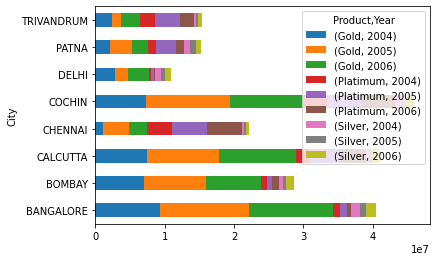

In [472]:
city_Product_spend.plot(kind='barh',stacked=True)


In [473]:
city_Product_spend.plot?

### 4. Create graphs for

a. Monthly comparison of total spends, city wise

In [474]:
Customer_Acqusition_spend['Months']=Customer_Acqusition_spend.Month.apply(lambda x:x.month)
Customer_Acqusition_spend.groupby(['Months','City'])[['Amount']].sum().reset_index()

,Months,City,Amount
0,1,BANGALORE,9041796.84
1,1,BOMBAY,5948993.33
2,1,CALCUTTA,9064864.90
3,1,CHENNAI,4466961.36
4,1,COCHIN,11714373.54
...,...,...,...
91,12,CHENNAI,223628.27
92,12,COCHIN,909533.05
93,12,DELHI,842342.02
94,12,PATNA,50000.00


In [475]:
Monthly_city_wise_spend=pd.pivot_table(data=Customer_Acqusition_spend,values='Amount',columns='City',index='Months',aggfunc='sum')

<AxesSubplot:xlabel='Months'>

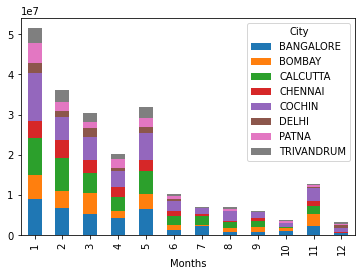

In [476]:
Monthly_city_wise_spend.plot(kind='bar',stacked=True)

b. Comparison of yearly spend on air tickets

In [477]:
AIR_TICKET_spend=Customer_Acqusition_spend.groupby(['Year','Type'])[['Amount']].sum().reset_index()

In [478]:
Customer_Acqusition_spend[Customer_Acqusition_spend.Type=='AIR TICKET'].groupby(['Year','Type'])[['Amount']].sum().reset_index()

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2005,AIR TICKET,10550152.21
2,2006,AIR TICKET,5248469.56


In [479]:
AIR_TICKET_spend=pd.pivot_table(data=Customer_Acqusition_spend[Customer_Acqusition_spend.Type=='AIR TICKET'],values='Amount',index='Year',columns='Type',aggfunc='sum')

<AxesSubplot:xlabel='Year'>

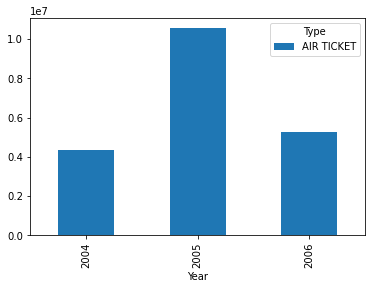

In [480]:
AIR_TICKET_spend.plot(kind='bar')

c. Comparison of monthly spend for each product (look for any seasonality
that exists in terms of spend)

In [481]:
Customer_Acqusition_spend.groupby(['Product','Months'])[['Amount']].sum().reset_index()

,Product,Months,Amount
0,Gold,1,32413831.83
1,Gold,2,24779179.55
2,Gold,3,19256972.48
3,Gold,4,13170572.59
4,Gold,5,21548169.76
5,Gold,6,6538862.64
6,Gold,7,5167416.37
7,Gold,8,4954030.42
8,Gold,9,3816887.62
9,Gold,10,3018223.38


In [482]:
monthly_spend_for_each_product=pd.pivot_table(data=Customer_Acqusition_spend,values='Amount',index='Months',columns='Product',aggfunc='sum')

<AxesSubplot:xlabel='Months'>

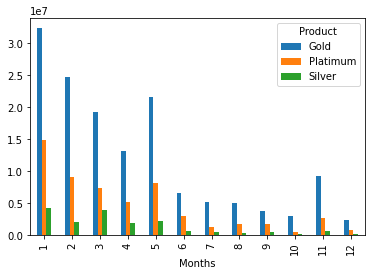

In [483]:
monthly_spend_for_each_product.plot(kind='bar')

## 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [484]:
Customer_Acqusition_Repayment=Customer_Acqusition_Repayment.drop(axis=0,columns='Repayment_month',inplace=False)

In [503]:
Customer_Acqusition_Repayment['M']=Customer_Acqusition_Repayment.Month.apply(lambda x : x.month)
Customer_Acqusition_Repayment['Y']=Customer_Acqusition_Repayment.Month.apply(lambda x : x.year)
Customer_Acqusition_Repayment.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,M,Y
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02,1,2004
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06,1,2004


You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month.

In [504]:
Customer_Acqusition_Repayment.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,M,Y
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02,1,2004


In [505]:
def top10Cust(Prod,time_period):
   return Customer_Acqusition_Repayment.loc[(Customer_Acqusition_Repayment.Product==Prod)].groupby(['Customer','City','Product',time_period])[['Amount']].sum().sort_values('Amount',ascending=False).reset_index().head(10)

In [508]:
Prod=str(input("Enter Gold/Silver/Platinum: "))
time_period=str(input("For Monthly Press (M) or For Yearly Press (Y) : "))


Enter Gold/Silver/Platinum: Gold
For Monthly Press (M) or For Yearly Press (Y) : M


In [509]:
Top10Cust=top10Cust(Prod,time_period)
Top10Cust

,Customer,City,Product,M,Amount
0,A61,COCHIN,Gold,4,3412860.60
1,A42,BOMBAY,Gold,5,3305341.39
2,A30,BANGALORE,Gold,5,3086549.14
3,A29,CALCUTTA,Gold,5,2612139.63
4,A42,BOMBAY,Gold,1,2516249.24
5,A60,CALCUTTA,Gold,1,2465584.81
6,A44,DELHI,Gold,1,2415712.91
7,A60,CALCUTTA,Gold,4,2397565.91
8,A28,TRIVANDRUM,Gold,5,2233253.41
9,A26,PATNA,Gold,5,2215839.66
